<a href="https://colab.research.google.com/github/hafedh-hichri/Deep-Learning/blob/main/Intro_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

you can view the presentation [here](https://1drv.ms/p/s!AtA2PxZZviSCjNFFceaKV08no3k-Qg?e=lG11II)

# downloading the dataset

In [ ]:
!git clone https://github.com/teavanist/MNIST-JPG.git
!unzip "./MNIST-JPG/MNIST Dataset JPG format.zip"
!rm -rf "./MNIST-JPG"

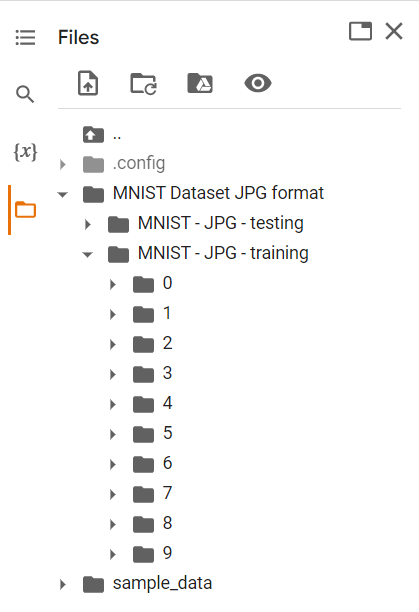

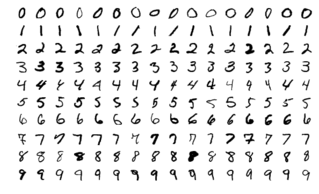

# loading the necessary libraries 

In [2]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt 
import cv2 

# loading the dataset into our python code 

(28, 28)


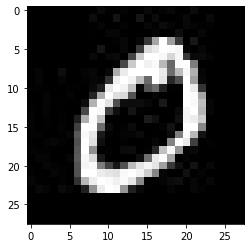

In [3]:
img = plt.imread("/content/MNIST Dataset JPG format/MNIST - JPG - training/0/1.jpg")
plt.imshow(img,cmap="gray")
print(img.shape)

In [4]:
# this is where the magic happens ✨
generator = ImageDataGenerator(rescale=1./255)

# train data
train_generator = generator.flow_from_directory(directory="./MNIST Dataset JPG format/MNIST - JPG - training",
                                                    target_size=(28,28),  #input_shape = (28,28)
                                                    shuffle = True,)

# test data
test_generator = generator.flow_from_directory(directory="./MNIST Dataset JPG format/MNIST - JPG - testing",
                                                    target_size=(28,28),  #input_shape = (28,28)
                                                    shuffle = True,)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [5]:
# each folder in correspondance to its category 
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

image shape is : (28, 28, 3)
category :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


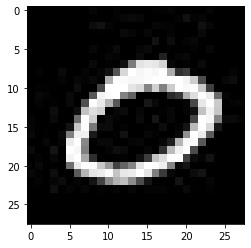

In [6]:
# in case you want to check some of your images
for batch in train_generator : 
  imgs , labels = batch
  print("image shape is :", imgs[0].shape)
  plt.imshow(imgs[0],cmap='gray')
  print("category : ",labels[0])
  break

# creating the model 

In [7]:
# this is our DL model ❤️🚀🚀
model = Sequential([
    # blocks of convolution followed by maxpooling 
    Conv2D(16,3,activation='relu',input_shape=(28,28,3)),
    MaxPooling2D(),

    Conv2D(32,3,activation='relu'),
    MaxPooling2D(),
    # flattening the data 
    Flatten(),
    # Dense layers
    Dense(64,activation='relu'),
    Dense(10,activation='softmax') # 10 = number of categories
])

In [8]:
model.compile('adam','categorical_crossentropy',metrics=['acc'])

In [9]:
model.fit(train_generator,epochs = 2 ,validation_data=test_generator)

Epoch 1/2
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1412 - acc: 0.9571 - val_loss: 0.0563 - val_acc: 0.9806
Epoch 2/2
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0471 - acc: 0.9855 - val_loss: 0.0530 - val_acc: 0.9825


# evaluating the AI

In [10]:
model.evaluate(test_generator)

313/313 [==============================] - 7s 21ms/step - loss: 0.0530 - acc: 0.9825


[0.053037989884614944, 0.9825000166893005]

# using the AI 

In [11]:
# loading an image 
img = cv2.imread("/content/MNIST Dataset JPG format/MNIST - JPG - testing/3/1020.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
X = img.reshape((1,28,28,3))
# using the AI 
preds = model.predict(X)
label = np.argmax(preds)
print("label = ",label)

1/1 [==============================] - 0s 123ms/step
label =  3


label =  3


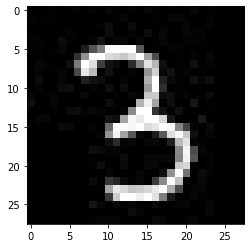

In [12]:
plt.imshow(img)
print('label = ',label)